In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import shapefile as shp
import seaborn as sns
import geopandas as gpd

In [3]:
#Import data

#write the references where I obtained this data

#database
data         = pd.read_csv("rced_en.csv")
data_geo     = pd.read_csv("geothermal_heating_facilities.csv")
well_ontario = pd.read_csv("Petroleum_Well_ontario.csv")

data["Community classification"].replace('Non-indigenous', 'Non-Indigenous', inplace=True)
replacement = {'QC':'Quebec', 'BC':'British Columbia', 'YT':'Yukon', 'AB':'Alberta', 'NU':'Nunavut', 'NL':'Newfoundland and Labrador', 'SK':'Saskatchewan', 'MB':'Manitoba', 'NT':'Northwest Territories', 'ON':'Ontario'}
data["Province/Territory"].replace(replacement,inplace=True)

#shapefile
file     = ("/home/ale/notebook/Vitalis/lpr_000b16a_e/provinces/")
province = gpd.read_file(file)
province = province.to_crs("EPSG:4326")

#gpd dataframes
abwell_ON              = well_ontario[well_ontario["WELL_MODE"]=="Abandoned Well"]
communities_dat        = gpd.GeoDataFrame(data,crs="EPSG:4326",geometry=gpd.points_from_xy(data['Longitude (°)'],data['Latitude (°)']))
abandoned_well_ontario = gpd.GeoDataFrame(abwell_ON,crs="EPSG:4326",geometry=gpd.points_from_xy(abwell_ON['X'],abwell_ON['Y']))

#colors plot
colors = {'Quebec':'#E24A33', 'British Columbia':'#348ABD', 'Yukon':'#988ED5', 'Alberta':'#777777', 'Nunavut':'#FBC15E',
          'Newfoundland and Labrador': '#8EBA42', 'Saskatchewan':'#FFB5B8', 'Manitoba':'purple','Northwest Territories':'darkorange', 'Ontario':'cyan'}

prov = data["Province/Territory"].unique()

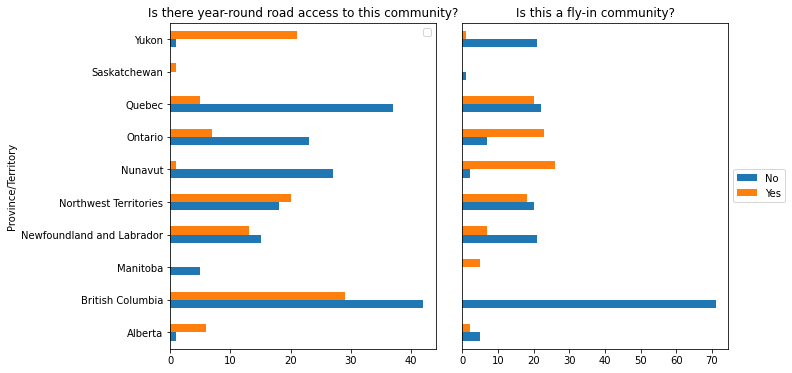

In [4]:
#
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.1, hspace=1)
data.groupby('Province/Territory')["Is there year-round road access to this community?"].value_counts().unstack(1).plot.barh(figsize=(10,6),ax=ax[0],title="Is there year-round road access to this community?")
data.groupby('Province/Territory')["Is this a fly-in community?"].value_counts().unstack(1).plot.barh(ax=ax[1],title="Is this a fly-in community?")
ax[0].legend('')
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

*Most remote communities in Yukon have year-round road access, and they are not fly-in communities.
*The only remote community in Saskatchewan has year-round road access but it is not a fly-in commynity.
*Most remote communities in Quebec do not have year-round road access, and almost half of them are fly-in communities.
*Most remote communities in Ontario do not have year-round road access, and most of them are fly-in communities.
*Most remote communities in Nunavut do not have year-round road access, and most of them are fly-in communities.
*Almost half of the remote communities in the Northwest Territories have year-round road access, and the other half are fly-in communities.
*Almost half of the remote communities in Newfoundland and Labrador have year-round road access, but most of them are not fly-in communities.
*Remote communities in Manitoba do not have year-round road access, but they are fly-in communities.
Most remote communities in Alberta have year-round road access, and most of them are not fly-in communities.

In summary, the availability of year-round road access and the prevalence of fly-in communities vary across different regions. Yukon, Saskatchewan, and Alberta have a higher proportion of remote communities with year-round road access, while Quebec, Ontario, Nunavut, and Manitoba mostly have remote communities without year-round road access and rely on fly-in access. The Northwest Territories and Newfoundland and Labrador have a more balanced distribution between communities with road access and fly-in communities.

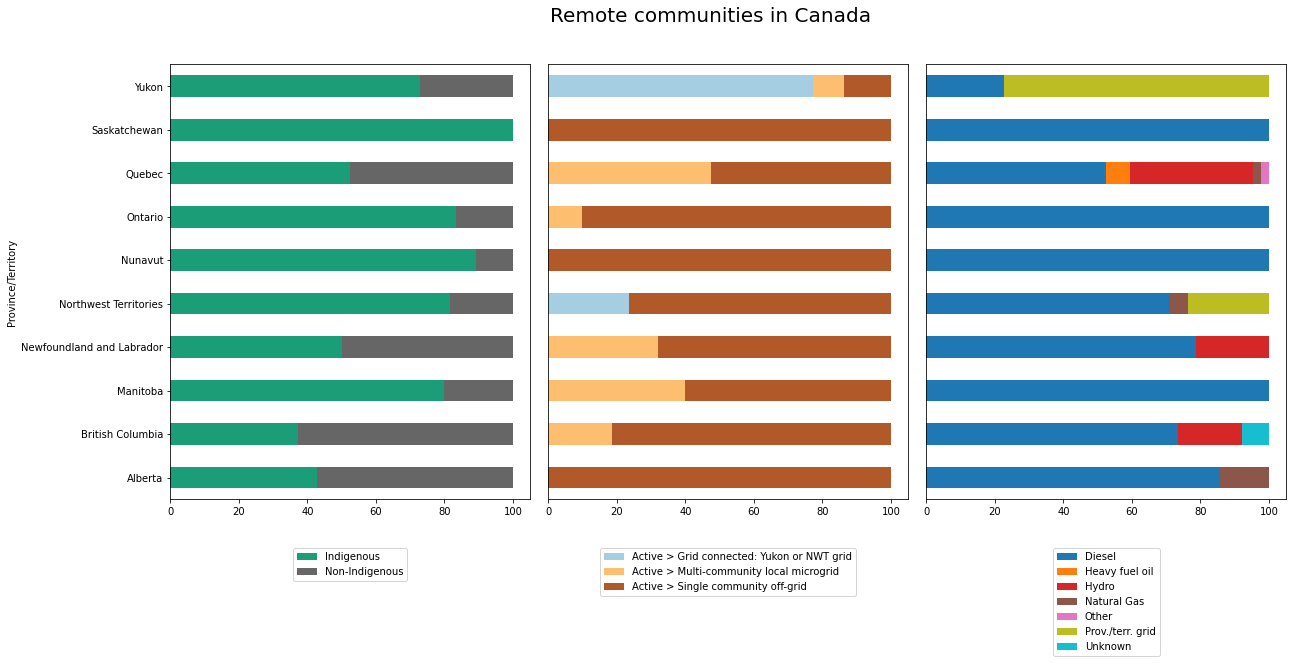

In [14]:
#
fig, ax = plt.subplots(nrows=1, ncols=3)
plt.subplots_adjust(wspace=0.05, hspace=0.3)

data.groupby('Province/Territory')["Community classification"].value_counts(normalize=True).mul(100).unstack().plot.barh(figsize=(20,8),ax=ax[0],stacked=True,colormap='Dark2')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)
data.groupby("Province/Territory")["Community record status"].value_counts(normalize=True).mul(100).unstack().plot.barh(figsize=(20,8),ax=ax[1],stacked=True,colormap='Paired')
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)

data.groupby("Province/Territory")['Main power source'].value_counts(normalize=True).mul(100).unstack().plot.barh(figsize=(20,8),ax=ax[2],stacked=True,colormap='tab10')
fig.suptitle("Remote communities in Canada",fontsize=20)
ax[2].set_ylabel('')
ax[2].set_yticks([])
ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)
plt.show()

*Most remote communities in Yukon are Indigenous. They are connected to the Yukon or Northwest Territories grids, and their main power source is obtained from the provincial/territorial grid.
*The only remote community in Saskatchewan is Indigenous. It is an off-grid community, and its main power source is diesel.
*Almost half of the remote communities in Quebec are Indigenous. They can be either multi-community local microgrids or single communities off-grid. The main power sources are diesel, followed by hydro, heavy fuel oil, and natural gas.
*Most remote communities in Ontario are Indigenous, and they are predominantly single communities off-grid. The primary power source is diesel.
*Most remote communities in Nunavut are Indigenous, and they are primarily single communities off-grid. The main power source is diesel.
*Most remote communities in the Northwest Territories are Indigenous. They can be single communities off-grid or connected to the Yukon or Northwest Territories grids. The main power source is diesel.
*Half of the remote communities in Newfoundland and Labrador are Indigenous, while the other half is not. They are mostly single communities off-grid or multi-community local microgrids. The primary power source is diesel, followed by hydro.
*Most remote communities in Manitoba are Indigenous. They can be multi-community local microgrids or single communities off-grid. The main power source is diesel.
*Most communities in British Columbia are not Indigenous, and they are single communities off-grid. The primary power source is diesel, followed by hydro.
*Almost half of the remote communities in Alberta are Indigenous. They are single communities off-grid, and the main power source is diesel, followed by natural gas.

Summary

The information provided highlights the characteristics of remote communities in different provinces and territories in Canada. Indigenous communities are prevalent in most of the remote areas, and the power sources primarily rely on diesel fuel. While some communities are connected to grids, many are off-grid and rely on localized power generation. Understanding the demographics and energy infrastructure of these communities is essential for developing sustainable and reliable energy solutions tailored to their specific needs.

In [118]:
#British Columbia is the province with more remote communities
data["Province/Territory"].value_counts()

British Columbia             75
Quebec                       42
Northwest Territories        38
Ontario                      30
Nunavut                      28
Newfoundland and Labrador    28
Yukon                        22
Alberta                       7
Manitoba                      5
Saskatchewan                  1
Name: Province/Territory, dtype: int64

In [11]:
#There are 4 provinces in which there is not renewable energy generation
#check geothermal resource potential
data.groupby("Province/Territory")["Total renewable energy generation (kW)"].describe()

,count,mean,std,min,25%,50%,75%,max
Province/Territory,,,,,,,,
Alberta,7.0,121622.142857,321781.943919,0.0,0.0,0.0,0.0,851355.000
British Columbia,75.0,470.866667,3094.176240,0.0,0.0,0.0,0.0,25000.000
Manitoba,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000
Newfoundland and Labrador,28.0,897.750000,4642.284971,0.0,0.0,0.0,0.0,24579.000
Northwest Territories,38.0,5126.418447,21006.661587,0.0,0.0,0.0,0.0,113275.000
Nunavut,28.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000
Ontario,30.0,46.087933,229.670130,0.0,0.0,0.0,0.0,1258.638
Quebec,42.0,3065.204762,13404.849235,0.0,0.0,0.0,0.0,75274.000
Saskatchewan,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.000


In [195]:
data["Main power source"]

0        Heavy fuel oil
1                 Hydro
2      Prov./terr. grid
3                 Hydro
4                 Hydro
             ...       
271              Diesel
272              Diesel
273              Diesel
274              Diesel
275              Diesel
Name: Main power source, Length: 276, dtype: object

In [12]:
data.groupby("Province/Territory")["Total fossil fuel generating capacity (kW)"].describe()

,count,mean,std,min,25%,50%,75%,max
Province/Territory,,,,,,,,
Alberta,7.0,3212.857143,6297.894210,48.0,110.0,201.0,2510.5,17000.0
British Columbia,45.0,1300.311111,2785.928920,8.0,125.0,150.0,995.0,13095.0
Manitoba,5.0,2873.000000,921.171808,2305.0,2305.0,2630.0,2630.0,4495.0
Newfoundland and Labrador,22.0,2996.500000,5592.662512,150.0,756.5,1510.0,2740.0,27000.0
Northwest Territories,35.0,5361.114286,10616.974377,240.0,740.5,1230.0,4205.0,51200.0
Nunavut,28.0,5007.214286,9364.353682,12.0,1350.0,1690.0,2780.0,37800.0
Ontario,29.0,1553.862069,992.240672,97.0,875.0,1710.0,2000.0,4575.0
Quebec,25.0,6831.840000,13794.690699,0.0,1085.0,1975.0,4900.0,67044.0
Saskatchewan,1.0,90.000000,NaN,90.0,90.0,90.0,90.0,90.0


In [14]:
#Quebec has the total fossil fuel generating capacity (kW)
#How many active or abandoned wells are in Quebec according to this?
#How is the renewable energy potential in Quebec?

#pie chart off grid

\begin{itemize}
\item The are 276 remote communities in Canada.
\item British Columbia is the province with the more number of remmote communities.
\item Even though Northwest territories have less remote communities, this region has 4 times more population in remote communities than British Columbia. Followed by Quebec as the most populated remote communities
\item The most populated remote community is Whitehorse located in Yukon, followed by Yellowknife located in Northwest Territories and Les Îles-de-la-Madeleine located in Quebec.
\item Some of the remote communities do not have assigned a population value (NaN) so they are not counted in the total numbe population.
\item the most pupulated province with remote communities are Northwest territories,Quebec and Nunavut.
\item Northwest teerritories are the one who has the highest total fosil fuel generating capacity, followed by Quebec and Nunavut.
\item Newfoundland and Labrador has a total fosil fuel generating capacity bigger than other provinces whose pupulation in remote communities are bigger, which means that it might be generation more that it consumes?.
\item Alberta has 7 remote communities its total renewable energy generation is bigger than fosil fuel generating capacity. We have to check if their renewable energ facilities are close to remote communities and why their main source of energy is diesel.
\item Find put which renewable energy is Alberta producing.
\end{itemize}

In [153]:
#Population relation between BC and NWT
#data.groupby("Province/Territory")["Population"].sum().sort_values()[9]/data.groupby("Province/Territory")["Population"].sum().sort_values()[4]
data.groupby("Province/Territory")["Population"].sum().sort_values()

Province/Territory
Saskatchewan                    10.0
Manitoba                      3545.0
Alberta                       5483.0
Newfoundland and Labrador     8338.0
British Columbia             10425.0
Ontario                      19327.0
Yukon                        31454.0
Nunavut                      36672.0
Quebec                       38823.0
Northwest Territories        42061.0
Name: Population, dtype: float64

In [172]:
#data[data["Community name"]=="Whitehorse"]
#data[data["Community name"]=="Les Îles-de-la-Madeleine"]
#data[data["Community name"]=="Iqaluit"]

In [177]:
data.groupby("Community name")["Population"].sum().sort_values()

Community name
Longworth                       0.0
Dome Creek                      0.0
Drury Inlet                     0.0
Stave Lake                      0.0
Eastgate                        0.0
                             ...   
Jasper                       4590.0
Iqaluit                      7740.0
Les Îles-de-la-Madeleine    12475.0
Yellowknife                 19569.0
Whitehorse                  25085.0
Name: Population, Length: 276, dtype: float64

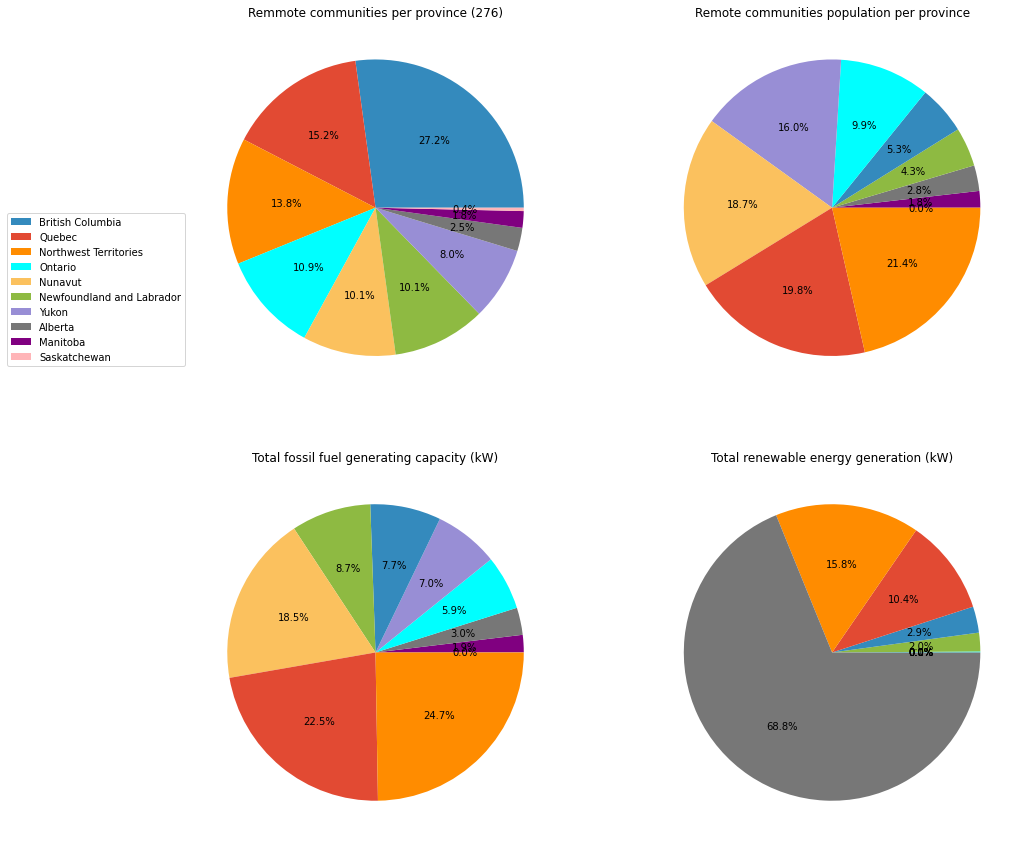

In [17]:
#

#colors = {'QC':'#E24A33', 'BC':'#348ABD', 'YT':'#988ED5', 'AB':'#777777', 'NU':'#FBC15E','NL': '#8EBA42','SK':'#FFB5B8',  'MB':'purple', 'NT':'darkorange', 'ON':'cyan'}

fig, axes = plt.subplots(nrows=2, ncols=2)

data["Province/Territory"].value_counts().plot.pie(autopct='%1.1f%%',colors=[colors[v] for v in data["Province/Territory"].value_counts().keys()], legend=True, figsize=(15, 15),title='Remmote communities per province (276)', ylabel='', labeldistance=None,ax=axes[0][0])
data.groupby("Province/Territory")["Total fossil fuel generating capacity (kW)"].sum().sort_values().plot.pie(autopct='%1.1f%%',colors=[colors[v] for v in data.groupby("Province/Territory")["Total fossil fuel generating capacity (kW)"].sum().sort_values().keys()],figsize=(15, 15),title='Total fossil fuel generating capacity (kW)', ylabel='', labeldistance=None,ax=axes[1][0])
data.groupby("Province/Territory")["Population"].sum().sort_values().plot.pie(autopct='%1.1f%%', colors=[colors[v] for v in data.groupby("Province/Territory")["Population"].sum().sort_values().keys()],figsize=(15, 15),title='Remote communities population per province', ylabel='', labeldistance=None,ax=axes[0][1])
data.groupby("Province/Territory")["Total renewable energy generation (kW)"].sum().sort_values().plot.pie(autopct='%1.1f%%',colors=[colors[v] for v in data.groupby("Province/Territory")["Total renewable energy generation (kW)"].sum().sort_values().keys()], figsize=(15, 15),title='Total renewable energy generation (kW)', ylabel='', labeldistance=None,ax=axes[1][1])
axes[0][0].legend(bbox_to_anchor=(0, 0.5))
plt.show()

In [18]:
#which communities the higher geothermal potential and what is their current main source of power?
#which communities are not connectec to the grid
#which communities produce renewable energy
#carbon capture?
#add the data of geothermal potential downloads

200 communities rely on diesel for heat and power

In [20]:
#201 communities rely on diesel for heat and power
data['Main power source'].describe()

count        276
unique         7
top       Diesel
freq         201
Name: Main power source, dtype: object

In [21]:
data['Main power source'].describe()

count        276
unique         7
top       Diesel
freq         201
Name: Main power source, dtype: object

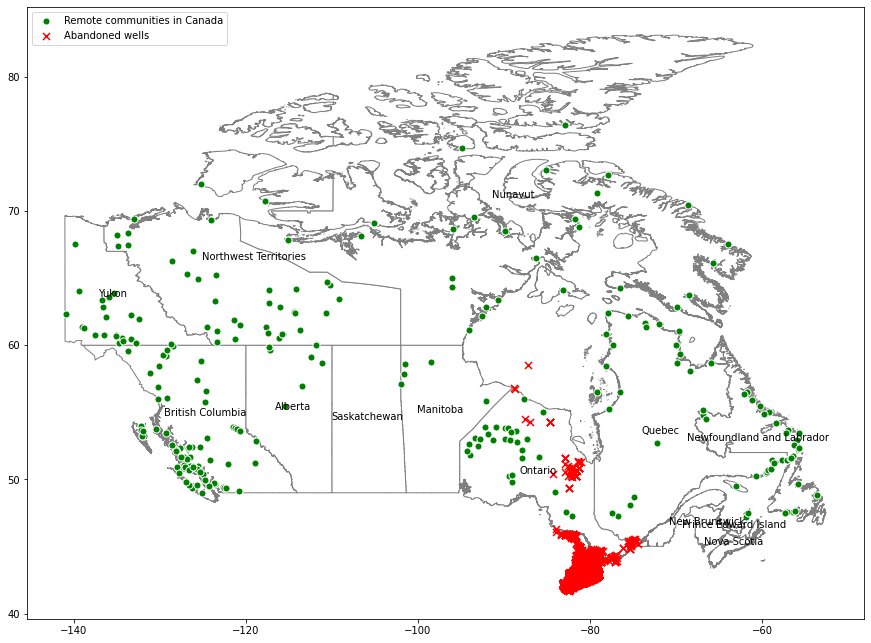

In [22]:
#
ax = province.plot(color='white',edgecolor="0.5", figsize=(15, 15))
province.apply(lambda x: ax.annotate(x.PRENAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1)
communities_dat.plot(ax=ax,label = "Remote communities in Canada",markersize=50,color='green',edgecolor="1")
abandoned_well_ontario.plot(ax=ax,label = "Abandoned wells",marker="x",markersize=50,color='red')
plt.legend(loc='upper left')
plt.show()

In [23]:
#Geothermal heating facilities
geo_heating_facilities_provinces = data_geo["Province or territory"].unique()
geo_heating_facilities_provinces

array(['NS', 'MB', 'YU', 'BC', 'SK'], dtype=object)

In [31]:
data_geo["Province or territory"].value_counts()

BC    16
MB    11
NS    10
YU     1
SK     1
Name: Province or territory, dtype: int64

In [81]:
data_geo

,OBJECTID,Name,Location,Province or territory,Latitude,Longitude
0,1,The People’s Place - Antigonish Town and Count...,Antigonish,NS,45.622401,-61.994511
1,2,Cumberland Energy Authority,Springhill,NS,45.637108,-64.081213
2,3,Alderney 5 Energy Project - Halifax Regional M...,Dartmouth,NS,44.664558,-63.574100
3,4,Halifax Harbour Seawater Geothermal,Halifax,NS,44.649192,-63.573552
4,5,4 Single Family Dwellings - Private Residences,Canard,NS,45.132390,-64.410678
5,6,Pictou Landing Health Centre - Pictou Landing ...,Pictou Landing,NS,45.674619,-62.654624
6,7,Port Hawkesbury Civic Centre – Town of Port Ha...,Port Hawkesbury,NS,45.616697,-61.356725
7,8,Prospect Community Centre,Prospect,NS,44.566826,-63.731330
8,9,East Dartmouth Community,East Dartmouth,NS,44.687535,-63.533271
9,10,Gordon R. Snow Community,Fall River,NS,44.813808,-63.618516


In [25]:
pd.read_csv('carbon_capture.csv')

,OBJECTID,Name,Location,Province or territory
0,1,Weyburn-Midale Project,Weyburn,SK
1,3,Boundary Dam,Estevan,SK
2,4,Shell Quest,Scotford,AB


In [26]:
#find the locations of depleted wells abandoned
#ask for the shape file of geothermal potential in canada

In [27]:
well_ontario["WELL_MODE"].unique()

array(['Unknown', 'Abandoned Well', 'Active Well', 'Suspended Well',
       'No Well Found', 'Abandoned and Junked (Lost)',
       'Plugged back and whipstocked', 'Capped Well', 'Potential'],
      dtype=object)

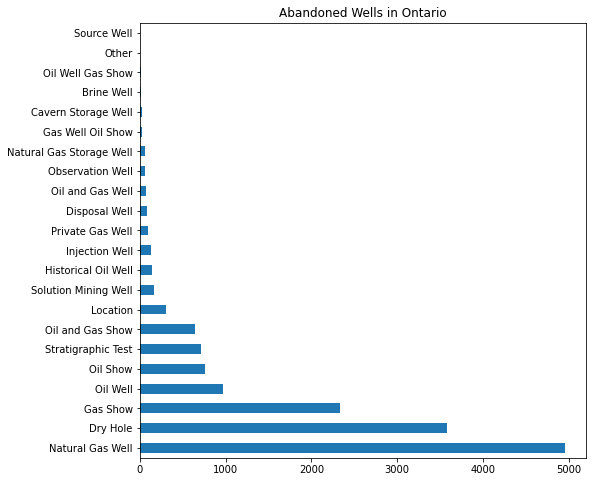

In [73]:
#
abwell_ON.WELL_TYPE.value_counts().plot.barh( figsize=(8, 8),title='Abandoned Wells in Ontario' )
plt.show()

In [196]:
data

,OBJECT ID,Community name,Alternative community name,Province/Territory,Community record status,Community type,Latitude (°),Longitude (°),Community classification,Indigenous category,...,Is this a fly-in community?,Population,Main power source,Name of service provider,Total fossil fuel generating capacity (kW),Annual fossil fuel generation (MWh/yr),Price of fuel at site,Units,Total renewable energy generation (kW),Community energy plan
0,1,Les Îles-de-la-Madeleine,Magdalen Islands,Quebec,Active > Multi-community local microgrid,Settlement,47.383330,-61.866600,Non-Indigenous,NaN,...,No,12475.0,Heavy fuel oil,Hydro-Quebec,67044.0,181648.00,0.7000,$/l,0.0,NaN
1,2,Ocean Falls,NaN,British Columbia,Active > Multi-community local microgrid,Settlement,52.350000,-127.700000,Non-Indigenous,NaN,...,No,203.0,Hydro,BC Hydro,NaN,NaN,NaN,NaN,10000.0,NaN
2,3,Whitehorse 8,NaN,Yukon,Active > Grid connected: Yukon or NWT grid,Settlement,60.750000,-135.080000,Indigenous,First Nation,...,No,NaN,Prov./terr. grid,Yukon Energy Corp.,NaN,NaN,0.3300,$/l,0.0,NaN
3,4,Bella Bella,Bella Bella 1,British Columbia,Active > Multi-community local microgrid,Settlement,52.160340,-128.145480,Indigenous,First Nation,...,No,1019.0,Hydro,BC Hydro,4900.0,982.87,NaN,NaN,0.0,NaN
4,5,Wagisla,NaN,British Columbia,Active > Multi-community local microgrid,Settlement,52.161667,-128.143611,Indigenous,First Nation,...,No,NaN,Hydro,BC Hydro,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,354,Peawanuck,"Winisk 90, Weenusk",Ontario,Active > Single community off-grid,Settlement,54.992730,-85.433390,Indigenous,First Nation,...,Yes,288.0,Diesel,Independent,1400.0,NaN,1.2600,$/l,0.0,Completed by Pembina 2007
272,355,Pikangikum,Pikangikum 14,Ontario,Active > Single community off-grid,Settlement,51.808600,-93.984330,Indigenous,First Nation,...,Yes,2720.0,Diesel,Independent,4575.0,NaN,NaN,NaN,0.0,NaN
273,356,Poplar Hill,NaN,Ontario,Active > Single community off-grid,Settlement,52.093330,-94.300000,Indigenous,First Nation,...,Yes,601.0,Diesel,Independent,1735.0,NaN,0.6400,$/l,0.0,NaN
274,357,Wawakapewin,Long Dog Lake,Ontario,Active > Single community off-grid,Settlement,53.500000,-89.142010,Indigenous,First Nation,...,Yes,47.0,Diesel,Independent,306.0,NaN,0.9100,$/l,0.0,NaN
